In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

Load in LILA CSV from [this commit](https://huggingface.co/datasets/imageomics/lila-bc-camera/blob/37b93ddf25c63bc30d8488ef78c1a53b9c4a3115/data/potential-test-sets/lila_image_urls_and_labels.csv). (this will take a while)

sha256:3fdf87ceea75f8720208a95350c3c70831a6c1c745a92bb68c7f2c3239e4c455
size 15931383983

In [2]:
df = pd.read_csv("../data/potential-test-sets/lila_image_urls_and_labels.csv", low_memory = False)
df.head()

dataset_name                                            url_gcp  \
0  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
1  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
2  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
3  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   
4  Caltech Camera Traps  https://storage.googleapis.com/public-datasets...   

                                             url_aws  \
0  http://us-west-2.opendata.source.coop.s3.amazo...   
1  http://us-west-2.opendata.source.coop.s3.amazo...   
2  http://us-west-2.opendata.source.coop.s3.amazo...   
3  http://us-west-2.opendata.source.coop.s3.amazo...   
4  http://us-west-2.opendata.source.coop.s3.amazo...   

                                           url_azure  \
0  https://lilawildlife.blob.core.windows.net/lil...   
1  https://lilawildlife.blob.core.windows.net/lil...   
2  https://lilawildlife.blob.core.windows.net/lil...   
3  https://lilawildlife.blob.core.windows.net/lil...   
4  https://lilawildlife.blob.core.windows.net/lil...   

                                            image_id  \
0  Caltech Camera Traps : 5968c0f9-23d2-11e8-a6a3...   
1  Caltech Camera Traps : 5a0b016f-23d2-11e8-a6a3...   
2  Caltech Camera Traps : 59b93afb-23d2-11e8-a6a3...   
3  Caltech Camera Traps : 59641f56-23d2-11e8-a6a3...   
4  Caltech Camera Traps : 5a1e5306-23d2-11e8-a6a3...   

                                         sequence_id  \
0  Caltech Camera Traps : 6f2160eb-5567-11e8-990e...   
1  Caltech Camera Traps : 6f27ed66-5567-11e8-9e92...   
2  Caltech Camera Traps : 6f04895c-5567-11e8-a3d6...   
3  Caltech Camera Traps : 6f0385b5-5567-11e8-a80b...   
4  Caltech Camera Traps : 6f0a3ccf-5567-11e8-92fb...   

                 location_id  frame_num original_label       scientific_name  \
0  Caltech Camera Traps : 26          1          empty                   NaN   
1  Caltech Camera Traps : 26          1           deer            odocoileus   
2  Caltech Camera Traps : 38          2            cat           felis catus   
3  Caltech Camera Traps : 38          2        opossum  didelphis virginiana   
4  Caltech Camera Traps : 33          2          empty                   NaN   

   ...    suborder infraorder superfamily       family    subfamily  \
0  ...         NaN        NaN         NaN          NaN          NaN   
1  ...  ruminantia        NaN         NaN     cervidae  capreolinae   
2  ...         NaN        NaN         NaN      felidae      felinae   
3  ...         NaN        NaN         NaN  didelphidae  didelphinae   
4  ...         NaN        NaN         NaN          NaN          NaN   

         tribe       genus               species subspecies variety  
0          NaN         NaN                   NaN        NaN     NaN  
1  odocoileini  odocoileus                   NaN        NaN     NaN  
2          NaN       felis           felis catus        NaN     NaN  
3   didelphini   didelphis  didelphis virginiana        NaN     NaN  
4          NaN         NaN                   NaN        NaN     NaN  

[5 rows x 32 columns]

In [3]:
df.columns

Index(['dataset_name', 'url_gcp', 'url_aws', 'url_azure', 'image_id',
       'sequence_id', 'location_id', 'frame_num', 'original_label',
       'scientific_name', 'common_name', 'datetime', 'annotation_level',
       'kingdom', 'phylum', 'subphylum', 'superclass', 'class', 'subclass',
       'infraclass', 'superorder', 'order', 'suborder', 'infraorder',
       'superfamily', 'family', 'subfamily', 'tribe', 'genus', 'species',
       'subspecies', 'variety'],
      dtype='object')

In [4]:
df.annotation_level.value_counts()

annotation_level
sequence    16807793
image        3533538
unknown      3382215
Name: count, dtype: int64

Annotation level indicates image vs sequence (or unknown), we specifically want those annotated at the image-level, since they should be "clean" images. Though we will want to label them with how many distinct species are in the image first.

We have 3,533,538 images labeled to the image-level.

### Check Dataset Counts

1. Make sure we have all datasets expected. We're specifically interested in:
    - [Snapshot Safari 2024 Expansion](https://lila.science/datasets/snapshot-safari-2024-expansion/)
    - [Ohio Small Animals](https://lila.science/datasets/ohio-small-animals/)
    - [Desert Lion Conservation Camera Traps](https://lila.science/datasets/desert-lion-conservation-camera-traps/)
    - [Orinoquia Camera Traps](https://lila.science/datasets/orinoquia-camera-traps/)
    - [SWG Camera Traps 2018-2020](https://lila.science/datasets/swg-camera-traps)
    - [Island Conservation Camera Traps](https://lila.science/datasets/island-conservation-camera-traps/)
    - [NOAA Puget Sound Nearshore Fish 2017-2018](https://lila.science/datasets/noaa-puget-sound-nearshore-fish) could be interesting for the  combined categories, though it is _very_ general (has only three labels: `fish`, `crab`, `fish_and_crab`).
2. Check which/how many datasets are labeled to the image level (and check for match to [Andrey's spreadsheet](https://docs.google.com/spreadsheets/d/1sC90DolAvswDUJ1lNSf0sk_norR24LwzX2O4g9OxMZE/edit?usp=drive_link)).

In [5]:
df.dataset_name.value_counts()

dataset_name
Snapshot Serengeti                            7261545
Snapshot Safari 2024 Expansion                4097015
NACTI                                         3382215
Trail Camera Images of New Zealand Animals    2453840
SWG Camera Traps                              2039657
Idaho Camera Traps                            1551552
WCS Camera Traps                              1369953
Wellington Camera Traps                        270450
Channel Islands Camera Traps                   245644
Caltech Camera Traps                           243177
UNSW Predators                                 131802
Island Conservation Camera Traps               128207
Ohio Small Animals                             118554
Orinoquia Camera Traps                         112267
Snapshot Mountain Zebra                         73606
Desert Lion Conservation Camera Traps           63468
Snapshot Karoo                                  38320
Snapshot Camdeboo                               30717
Snapshot Enonki

In [6]:
df.groupby(["dataset_name"]).annotation_level.value_counts()

dataset_name                                annotation_level
Caltech Camera Traps                        image                243177
Channel Islands Camera Traps                image                245644
Desert Lion Conservation Camera Traps       image                 63468
ENA24                                       image                 10284
Idaho Camera Traps                          sequence            1551552
Island Conservation Camera Traps            image                128207
Missouri Camera Traps                       sequence              23397
                                            image                  1276
NACTI                                       unknown             3382215
Ohio Small Animals                          image                118554
Orinoquia Camera Traps                      image                112267
SWG Camera Traps                            sequence            2039657
Seattle(ish) Camera Traps                   image                 25019
Sna

It seems snapshot safari exapansion and SWG camera traps are not labeled at the image level, despite the indication in the spreadsheet...

The NOAA one isn't here, but that's okay. Let's also take a look at [ENA24](https://lila.science/datasets/ena24detection).

We'll subset to just the 7 identified, though we'll likely not continue with Snapshot Safari and SWG, since we want to make sure the test set labels are accurate.

In [7]:
datasets_of_interest = ["Desert Lion Conservation Camera Traps",
                        "Island Conservation Camera Traps",
                        "Ohio Small Animals",
                        "Orinoquia Camera Traps",
                        "SWG Camera Traps",
                        "Snapshot Safari 2024 Expansion",
                        "ENA24"]

In [8]:
reduced_df = df.loc[df["dataset_name"].isin(datasets_of_interest)].copy()
reduced_df.head()

dataset_name                                            url_gcp  \
243177        ENA24  https://storage.googleapis.com/public-datasets...   
243178        ENA24  https://storage.googleapis.com/public-datasets...   
243179        ENA24  https://storage.googleapis.com/public-datasets...   
243180        ENA24  https://storage.googleapis.com/public-datasets...   
243181        ENA24  https://storage.googleapis.com/public-datasets...   

                                                  url_aws  \
243177  http://us-west-2.opendata.source.coop.s3.amazo...   
243178  http://us-west-2.opendata.source.coop.s3.amazo...   
243179  http://us-west-2.opendata.source.coop.s3.amazo...   
243180  http://us-west-2.opendata.source.coop.s3.amazo...   
243181  http://us-west-2.opendata.source.coop.s3.amazo...   

                                                url_azure      image_id  \
243177  https://lilawildlife.blob.core.windows.net/lil...     ENA24 : 1   
243178  https://lilawildlife.blob.core.windows.net/lil...    ENA24 : 10   
243179  https://lilawildlife.blob.core.windows.net/lil...   ENA24 : 100   
243180  https://lilawildlife.blob.core.windows.net/lil...  ENA24 : 1000   
243181  https://lilawildlife.blob.core.windows.net/lil...  ENA24 : 1001   

            sequence_id location_id  frame_num         original_label  \
243177  ENA24 : unknown       ENA24         -1                   bird   
243178  ENA24 : unknown       ENA24         -1                   bird   
243179  ENA24 : unknown       ENA24         -1  eastern gray squirrel   
243180  ENA24 : unknown       ENA24         -1       eastern chipmunk   
243181  ENA24 : unknown       ENA24         -1       eastern chipmunk   

             scientific_name  ...      suborder infraorder superfamily  \
243177                  aves  ...           NaN        NaN         NaN   
243178                  aves  ...           NaN        NaN         NaN   
243179  sciurus carolinensis  ...  sciuromorpha        NaN         NaN   
243180       tamias striatus  ...  sciuromorpha        NaN         NaN   
243181       tamias striatus  ...  sciuromorpha        NaN         NaN   

           family  subfamily     tribe    genus               species  \
243177        NaN        NaN       NaN      NaN                   NaN   
243178        NaN        NaN       NaN      NaN                   NaN   
243179  sciuridae  sciurinae  sciurini  sciurus  sciurus carolinensis   
243180  sciuridae    xerinae   tamiini   tamias       tamias striatus   
243181  sciuridae    xerinae   tamiini   tamias       tamias striatus   

       subspecies variety  
243177        NaN     NaN  
243178        NaN     NaN  
243179        NaN     NaN  
243180        NaN     NaN  
243181        NaN     NaN  

[5 rows x 32 columns]

Observe that we also now get multiple URL options; `url_aws` will likely be best/fastest for use with [`distributed-downloader`](https://github.com/Imageomics/distributed-downloader) to get the images.

In [9]:
reduced_df.info(show_counts = True)

IOStream.flush timed out


<class 'pandas.core.frame.DataFrame'>
Index: 6569452 entries, 243177 to 23566724
Data columns (total 32 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   dataset_name      6569452 non-null  object
 1   url_gcp           6569452 non-null  object
 2   url_aws           6569452 non-null  object
 3   url_azure         6569452 non-null  object
 4   image_id          6569452 non-null  object
 5   sequence_id       6569452 non-null  object
 6   location_id       6569452 non-null  object
 7   frame_num         6569452 non-null  int64 
 8   original_label    6569452 non-null  object
 9   scientific_name   2884628 non-null  object
 10  common_name       2884628 non-null  object
 11  datetime          2393651 non-null  object
 12  annotation_level  6569452 non-null  object
 13  kingdom           2884628 non-null  object
 14  phylum            2747716 non-null  object
 15  subphylum         2747716 non-null  object
 16  superclass       

Let's remove empty frames to get a better sense of what we have.

In [15]:
df_cleaned = reduced_df.loc[reduced_df.original_label != "empty"].copy()
df_cleaned.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 3539355 entries, 243177 to 23566051
Data columns (total 32 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   dataset_name      3539355 non-null  object
 1   url_gcp           3539355 non-null  object
 2   url_aws           3539355 non-null  object
 3   url_azure         3539355 non-null  object
 4   image_id          3539355 non-null  object
 5   sequence_id       3539355 non-null  object
 6   location_id       3539355 non-null  object
 7   frame_num         3539355 non-null  int64 
 8   original_label    3539355 non-null  object
 9   scientific_name   2884628 non-null  object
 10  common_name       2884628 non-null  object
 11  datetime          2019552 non-null  object
 12  annotation_level  3539355 non-null  object
 13  kingdom           2884628 non-null  object
 14  phylum            2747716 non-null  object
 15  subphylum         2747716 non-null  object
 16  superclass       

Not all have a scientific name, though those could be the non-taxa labels.

In [16]:
df_cleaned.loc[df_cleaned["scientific_name"].isna(), "original_label"].value_counts()

original_label
problem      288579
blurred      184620
ignore       177546
unknown        2221
fire           1140
eye_shine       328
vehicle         293
Name: count, dtype: int64

These are clearly also labels to remove, so we can simply reduce down to only those with non-null `scientific_name` values as well.

In [17]:
df_cleaned = df_cleaned.loc[~df_cleaned["scientific_name"].isna()].copy()
df_cleaned.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2884628 entries, 243177 to 23566051
Data columns (total 32 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   dataset_name      2884628 non-null  object
 1   url_gcp           2884628 non-null  object
 2   url_aws           2884628 non-null  object
 3   url_azure         2884628 non-null  object
 4   image_id          2884628 non-null  object
 5   sequence_id       2884628 non-null  object
 6   location_id       2884628 non-null  object
 7   frame_num         2884628 non-null  int64 
 8   original_label    2884628 non-null  object
 9   scientific_name   2884628 non-null  object
 10  common_name       2884628 non-null  object
 11  datetime          1366269 non-null  object
 12  annotation_level  2884628 non-null  object
 13  kingdom           2884628 non-null  object
 14  phylum            2747716 non-null  object
 15  subphylum         2747716 non-null  object
 16  superclass       

In [18]:
df_cleaned.nunique()

dataset_name              7
url_gcp             2816041
url_aws             2816041
url_azure           2816041
image_id            2816041
sequence_id          933146
location_id            3090
frame_num               598
original_label          446
scientific_name         368
common_name             397
datetime            1216843
annotation_level          2
kingdom                   1
phylum                    2
subphylum                 4
superclass                1
class                     7
subclass                  3
infraclass                2
superorder                5
order                    44
suborder                 14
infraorder                7
superfamily               8
family                  101
subfamily                53
tribe                    33
genus                   234
species                 283
subspecies               17
variety                   1
dtype: int64

We have 368 unique `scientific_name` values, some of which were definitely just higher ranks (e.g., Aves), but there are 283 species, so somewhere between the two should be our biodiversity.

Interesting also to note that there are duplicate URLs here; these would be the indicators of multiple species in an image as they correspond to the number of unique image IDs. Though, those could also be the by-sequence images that we expected to be by-image.

In [19]:
#double-check for humans
df_cleaned.loc[df_cleaned.species == "homo sapien"]

Empty DataFrame
Columns: [dataset_name, url_gcp, url_aws, url_azure, image_id, sequence_id, location_id, frame_num, original_label, scientific_name, common_name, datetime, annotation_level, kingdom, phylum, subphylum, superclass, class, subclass, infraclass, superorder, order, suborder, infraorder, superfamily, family, subfamily, tribe, genus, species, subspecies, variety]
Index: []

[0 rows x 32 columns]

## Save the Reduced Data (no more "empty" labels)

In [20]:
df_cleaned.to_csv("../data/potential-test-sets/lila_image_urls_and_labels.csv", index = False)

In [21]:
print(df_cleaned.phylum.value_counts())
print()
print(df_cleaned["class"].value_counts())

phylum
chordata      2740734
arthropoda       6982
Name: count, dtype: int64

class
mammalia        2453739
aves             209290
reptilia          49813
insecta            6898
amphibia            592
malacostraca         79
arachnida             5
Name: count, dtype: int64


All images are in Animalia, as expected; we have 2 phyla represented and 8 classes:
 - Predominantly Chordata, and within that phylum, Mammalia is the vast majority, though aves is about 10%.
 - Note that not every image with a phylum label has a class label.
 - Insecta, malacostraca, and arachnida are all in the class Arthropoda.

### Label Multi-Species Images
We'll go by both the URL and image ID, which do seem to correspond to the same images (for uniqueness).

In [22]:
df_cleaned["multi_species"] = df_cleaned.duplicated(subset = ["url_aws", "image_id"], keep = False)

df_cleaned.loc[df_cleaned["multi_species"]].nunique()

dataset_name            4
url_gcp             62877
url_aws             62877
url_azure           62877
image_id            62877
sequence_id         26489
location_id           944
frame_num              25
original_label        148
scientific_name       131
common_name           142
datetime              383
annotation_level        2
kingdom                 1
phylum                  2
subphylum               4
superclass              1
class                   6
subclass                3
infraclass              2
superorder              4
order                  25
suborder                9
infraorder              5
superfamily             4
family                 45
subfamily              21
tribe                  20
genus                  86
species                95
subspecies             10
variety                 1
multi_species           1
dtype: int64

We've got just under 63K images that have multiple species. We can figure out how many each of them have, and then move on to looking at images per sequence and other labeling info.

In [23]:
multi_sp_imgs = list(df_cleaned.loc[df_cleaned["multi_species"], "image_id"].unique())

In [24]:
for img in multi_sp_imgs:
    df_cleaned.loc[df_cleaned["image_id"] == img, "num_species"] = df_cleaned.loc[df_cleaned["image_id"] == img].shape[0]
    
df_cleaned.head()

dataset_name                                            url_gcp  \
243177        ENA24  https://storage.googleapis.com/public-datasets...   
243178        ENA24  https://storage.googleapis.com/public-datasets...   
243179        ENA24  https://storage.googleapis.com/public-datasets...   
243180        ENA24  https://storage.googleapis.com/public-datasets...   
243181        ENA24  https://storage.googleapis.com/public-datasets...   

                                                  url_aws  \
243177  http://us-west-2.opendata.source.coop.s3.amazo...   
243178  http://us-west-2.opendata.source.coop.s3.amazo...   
243179  http://us-west-2.opendata.source.coop.s3.amazo...   
243180  http://us-west-2.opendata.source.coop.s3.amazo...   
243181  http://us-west-2.opendata.source.coop.s3.amazo...   

                                                url_azure      image_id  \
243177  https://lilawildlife.blob.core.windows.net/lil...     ENA24 : 1   
243178  https://lilawildlife.blob.core.windows.net/lil...    ENA24 : 10   
243179  https://lilawildlife.blob.core.windows.net/lil...   ENA24 : 100   
243180  https://lilawildlife.blob.core.windows.net/lil...  ENA24 : 1000   
243181  https://lilawildlife.blob.core.windows.net/lil...  ENA24 : 1001   

            sequence_id location_id  frame_num         original_label  \
243177  ENA24 : unknown       ENA24         -1                   bird   
243178  ENA24 : unknown       ENA24         -1                   bird   
243179  ENA24 : unknown       ENA24         -1  eastern gray squirrel   
243180  ENA24 : unknown       ENA24         -1       eastern chipmunk   
243181  ENA24 : unknown       ENA24         -1       eastern chipmunk   

             scientific_name  ... superfamily     family  subfamily     tribe  \
243177                  aves  ...         NaN        NaN        NaN       NaN   
243178                  aves  ...         NaN        NaN        NaN       NaN   
243179  sciurus carolinensis  ...         NaN  sciuridae  sciurinae  sciurini   
243180       tamias striatus  ...         NaN  sciuridae    xerinae   tamiini   
243181       tamias striatus  ...         NaN  sciuridae    xerinae   tamiini   

          genus               species subspecies variety multi_species  \
243177      NaN                   NaN        NaN     NaN         False   
243178      NaN                   NaN        NaN     NaN         False   
243179  sciurus  sciurus carolinensis        NaN     NaN         False   
243180   tamias       tamias striatus        NaN     NaN         False   
243181   tamias       tamias striatus        NaN     NaN         False   

       num_species  
243177         NaN  
243178         NaN  
243179         NaN  
243180         NaN  
243181         NaN  

[5 rows x 34 columns]

Set all the non-multi species images to show 1 in the `num_species` column.

In [25]:
df_cleaned.loc[df_cleaned["num_species"].isna(), "num_species"] = 1.0

df_cleaned.num_species.value_counts()

num_species
1.0     2753164
2.0      115436
3.0       14052
4.0        1704
5.0         230
14.0         42
Name: count, dtype: int64

In [26]:
df_cleaned.loc[df_cleaned["num_species"] == 14.0].sample(4)

dataset_name  \
20052440  Snapshot Safari 2024 Expansion   
20052425  Snapshot Safari 2024 Expansion   
20052443  Snapshot Safari 2024 Expansion   
20052439  Snapshot Safari 2024 Expansion   

                                                    url_gcp  \
20052440  https://storage.googleapis.com/public-datasets...   
20052425  https://storage.googleapis.com/public-datasets...   
20052443  https://storage.googleapis.com/public-datasets...   
20052439  https://storage.googleapis.com/public-datasets...   

                                                    url_aws  \
20052440  http://us-west-2.opendata.source.coop.s3.amazo...   
20052425  http://us-west-2.opendata.source.coop.s3.amazo...   
20052443  http://us-west-2.opendata.source.coop.s3.amazo...   
20052439  http://us-west-2.opendata.source.coop.s3.amazo...   

                                                  url_azure  \
20052440  https://lilawildlife.blob.core.windows.net/lil...   
20052425  https://lilawildlife.blob.core.windows.net/lil...   
20052443  https://lilawildlife.blob.core.windows.net/lil...   
20052439  https://lilawildlife.blob.core.windows.net/lil...   

                                                   image_id  \
20052440  Snapshot Safari 2024 Expansion : Snapshot Came...   
20052425  Snapshot Safari 2024 Expansion : Snapshot Came...   
20052443  Snapshot Safari 2024 Expansion : Snapshot Came...   
20052439  Snapshot Safari 2024 Expansion : Snapshot Came...   

                                                sequence_id  \
20052440  Snapshot Safari 2024 Expansion : EFA_S1#EFA08#...   
20052425  Snapshot Safari 2024 Expansion : EFA_S1#EFA08#...   
20052443  Snapshot Safari 2024 Expansion : EFA_S1#EFA08#...   
20052439  Snapshot Safari 2024 Expansion : EFA_S1#EFA08#...   

                                            location_id  frame_num  \
20052440  Snapshot Safari 2024 Expansion : EFA_S1_EFA08          1   
20052425  Snapshot Safari 2024 Expansion : EFA_S1_EFA08          0   
20052443  Snapshot Safari 2024 Expansion : EFA_S1_EFA08          1   
20052439  Snapshot Safari 2024 Expansion : EFA_S1_EFA08          1   

         original_label     scientific_name  ... superfamily         family  \
20052440       aardwolf  proteles cristatus  ...         NaN      hyaenidae   
20052425        ostrich       struthionidae  ...         NaN  struthionidae   
20052443       lionmale        panthera leo  ...         NaN        felidae   
20052439        ostrich       struthionidae  ...         NaN  struthionidae   

            subfamily tribe     genus             species subspecies variety  \
20052440   protelinae   NaN  proteles  proteles cristatus        NaN     NaN   
20052425          NaN   NaN       NaN                 NaN        NaN     NaN   
20052443  pantherinae   NaN  panthera        panthera leo        NaN     NaN   
20052439          NaN   NaN       NaN                 NaN        NaN     NaN   

         multi_species num_species  
20052440          True        14.0  
20052425          True        14.0  
20052443          True        14.0  
20052439          True        14.0  

[4 rows x 34 columns]

Found a typo above with the human check... seems all taxa are lowercase, but let's make sure it's enough to catch them all

In [27]:
print("num homo sapiens: ", df_cleaned.loc[df_cleaned.species == "homo sapiens"].shape)
df_cleaned.loc[df_cleaned["original_label"] == "human"].shape

num homo sapiens:  (16944, 34)


(16944, 34)

Did any of these factor in to the multi-species counts?

In [28]:
df_cleaned.loc[(df_cleaned["species"] == "homo sapiens") & (df_cleaned["multi_species"])].shape

(353, 34)

In [29]:
df_cleaned.loc[(df_cleaned["species"] == "homo sapiens") & (df_cleaned["multi_species"])].sample(4)

dataset_name                                            url_gcp  \
247895        ENA24  https://storage.googleapis.com/public-datasets...   
247621        ENA24  https://storage.googleapis.com/public-datasets...   
247631        ENA24  https://storage.googleapis.com/public-datasets...   
250361        ENA24  https://storage.googleapis.com/public-datasets...   

                                                  url_aws  \
247895  http://us-west-2.opendata.source.coop.s3.amazo...   
247621  http://us-west-2.opendata.source.coop.s3.amazo...   
247631  http://us-west-2.opendata.source.coop.s3.amazo...   
250361  http://us-west-2.opendata.source.coop.s3.amazo...   

                                                url_azure      image_id  \
247895  https://lilawildlife.blob.core.windows.net/lil...  ENA24 : 4935   
247621  https://lilawildlife.blob.core.windows.net/lil...  ENA24 : 4804   
247631  https://lilawildlife.blob.core.windows.net/lil...  ENA24 : 4809   
250361  https://lilawildlife.blob.core.windows.net/lil...  ENA24 : 6989   

            sequence_id location_id  frame_num original_label scientific_name  \
247895  ENA24 : unknown       ENA24         -1          human    homo sapiens   
247621  ENA24 : unknown       ENA24         -1          human    homo sapiens   
247631  ENA24 : unknown       ENA24         -1          human    homo sapiens   
250361  ENA24 : unknown       ENA24         -1          human    homo sapiens   

        ... superfamily     family  subfamily tribe genus       species  \
247895  ...  hominoidea  hominidae  homininae   NaN  homo  homo sapiens   
247621  ...  hominoidea  hominidae  homininae   NaN  homo  homo sapiens   
247631  ...  hominoidea  hominidae  homininae   NaN  homo  homo sapiens   
250361  ...  hominoidea  hominidae  homininae   NaN  homo  homo sapiens   

       subspecies variety multi_species num_species  
247895        NaN     NaN          True         2.0  
247621        NaN     NaN          True         2.0  
247631        NaN     NaN          True         2.0  
250361        NaN     NaN          True         2.0  

[4 rows x 34 columns]

Let's fix those counts then.

In [30]:
human_multi_species = list(df_cleaned.loc[(df_cleaned["species"] == "homo sapiens") & (df_cleaned["multi_species"]), "image_id"].unique())

for img in human_multi_species:
    df_cleaned.loc[df_cleaned["image_id"] == img, "num_species"] = df_cleaned.loc[df_cleaned["image_id"] == img, "num_species"] - 1

df_cleaned.num_species.value_counts()

num_species
1.0     2753832
2.0      114825
3.0       13995
4.0        1704
5.0         230
14.0         42
Name: count, dtype: int64

Actually remove human indicators

In [31]:
df_cleaned = df_cleaned.loc[df_cleaned["species"] != "homo sapiens"].copy()

Need to remove the images that have humans and other species too.

In [35]:
df_cleaned = df_cleaned.loc[~df_cleaned["image_id"].isin(human_multi_species)].copy()

#### Save this to CSV now we got those counts

In [36]:
df_cleaned.to_csv("../data/potential-test-sets/lila_image_urls_and_labels.csv", index = False)

### Generate individual CSVs for the datasets

In [37]:
for dataset in datasets_of_interest:
    df_cleaned.loc[df_cleaned["dataset_name"] == dataset].to_csv(dataset+"_image_urls_and_labels.csv", index = False)

# Manually moved these to the data/potential-test-sets/ directory and renamed to not have spaces in the filenames
# (replaced spaces with underscores)

Get some basic stats

In [38]:
print(f"there are {df_cleaned.shape[0]} images")
print(f"we have {df_cleaned['scientific_name'].nunique()} unique scientific names")
print(f"when we filter for image-level labels, we have {df_cleaned.loc[df_cleaned['annotation_level'] == 'image', 'scientific_name'].nunique()} scientific names")

there are 2867312 images
we have 367 unique scientific names
when we filter for image-level labels, we have 184 scientific names


In [39]:
df_cleaned.loc[df_cleaned['annotation_level'] == 'image', 'num_species'].value_counts()

num_species
1.0    305821
2.0      1154
3.0         3
Name: count, dtype: int64

We will want to dedicate some more time to exploring some of these taxonomic counts, but we'll first look at the number of unique taxa (by Linnean 7-rank (`unique_7_tuple`)). We'll compare these to the number of unique scientific and common names, then perhaps add a count of number of creatures based on one of those labels. At that point we may save another copy of this CSV and start a new analysis notebook.

In [40]:
df_cleaned.annotation_level.value_counts()

annotation_level
sequence    2560334
image        306978
Name: count, dtype: int64

Let's get a sense of total number of unique taxa, then separate out the by-image ones for unique taxa count there. Then we'll separate out each dataset into its own CSV for individual analysis.

### Taxonomic String Exploration

In [41]:
lin_taxa = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

#### How many have all 7 Linnean ranks?

In [42]:
df_all_taxa = df_cleaned.dropna(subset = lin_taxa)
df_all_taxa[lin_taxa].info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2187756 entries, 243179 to 23565561
Data columns (total 7 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   kingdom  2187756 non-null  object
 1   phylum   2187756 non-null  object
 2   class    2187756 non-null  object
 3   order    2187756 non-null  object
 4   family   2187756 non-null  object
 5   genus    2187756 non-null  object
 6   species  2187756 non-null  object
dtypes: object(7)
memory usage: 133.5+ MB


In [43]:
df_all_taxa_img = df_cleaned.loc[df_cleaned["annotation_level"] == "image"].dropna(subset = lin_taxa)
df_all_taxa_img[lin_taxa].info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 249847 entries, 243179 to 19469709
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   kingdom  249847 non-null  object
 1   phylum   249847 non-null  object
 2   class    249847 non-null  object
 3   order    249847 non-null  object
 4   family   249847 non-null  object
 5   genus    249847 non-null  object
 6   species  249847 non-null  object
dtypes: object(7)
memory usage: 15.2+ MB


In [45]:
df_cleaned.loc[df_cleaned["annotation_level"] == "image"].shape

(306978, 34)

That's not too bad, considering some are definitely just common names or classes: 2,187,756 out of 2,867,312. 

249,847 when we drop to just image-level annotations (out of 306,978).


Now how many different 7-tuples are there?

#### How many unique 7-tuples?

In [46]:
#number of unique 7-tuples in full dataset
df_cleaned['lin_duplicate'] = df_cleaned.duplicated(subset = lin_taxa, keep = 'first')
df_unique_lin_taxa = df_cleaned.loc[~df_cleaned['lin_duplicate']].copy()
print(f"unique taxa in all: {df_unique_lin_taxa.shape[0]}")
print(f"unique taxa in image-level labeled: {df_unique_lin_taxa.loc[df_unique_lin_taxa["annotation_level"] == "image"].shape[0]}")

unique taxa in all: 355
unique taxa in image-level labeled: 180


Pretty much aligns with the scientific name counts.

In [47]:
df_unique_lin_taxa.scientific_name.nunique()

355

In [48]:
df_unique_lin_taxa.loc[(df_unique_lin_taxa["scientific_name"].isna()) | (df_unique_lin_taxa["common_name"].isna())]

Empty DataFrame
Columns: [dataset_name, url_gcp, url_aws, url_azure, image_id, sequence_id, location_id, frame_num, original_label, scientific_name, common_name, datetime, annotation_level, kingdom, phylum, subphylum, superclass, class, subclass, infraclass, superorder, order, suborder, infraorder, superfamily, family, subfamily, tribe, genus, species, subspecies, variety, multi_species, num_species, lin_duplicate]
Index: []

[0 rows x 35 columns]

Let's check out our top ten labels, scientific names, and common names. Then we'll save this cleaned metadata file.

In [49]:
df_cleaned["original_label"].value_counts()[:10]

original_label
eurasian_wild_pig         234736
impala                    231338
zebraplains               121619
wildebeestblue            121208
large_antlered_muntjac    119774
elephant                  119579
unknown                   117522
unidentified_murid         98858
sambar                     74459
stump_tailed_macaque       73543
Name: count, dtype: int64

In [50]:
df_cleaned["scientific_name"].value_counts()[:10]

scientific_name
sus scrofa                        237022
aepyceros melampus                231338
animalia                          136912
equus quagga                      121619
connochaetes taurinus taurinus    121208
loxodonta africana                121013
muntiacus vuquangensis            119774
muridae                            98858
aves                               80435
rusa unicolor                      74459
Name: count, dtype: int64

In [51]:
df_cleaned["common_name"].value_counts()[:10]

common_name
eurasian wild pig          234736
impala                     231338
plains zebra               121619
blue wildebeest            121208
large-antlered muntjac     119774
african bush elephant      119579
unkown animal              117522
old-world mice and rats     98858
bird                        79568
sambar                      74459
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='class'>

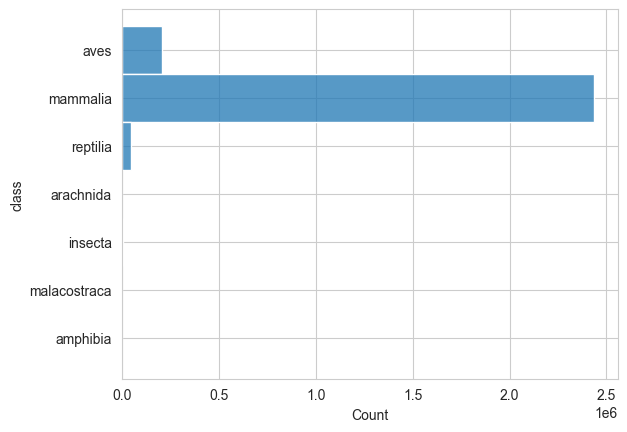

In [52]:
sns.histplot(df_cleaned, y = 'class')

<Axes: xlabel='Count', ylabel='order'>

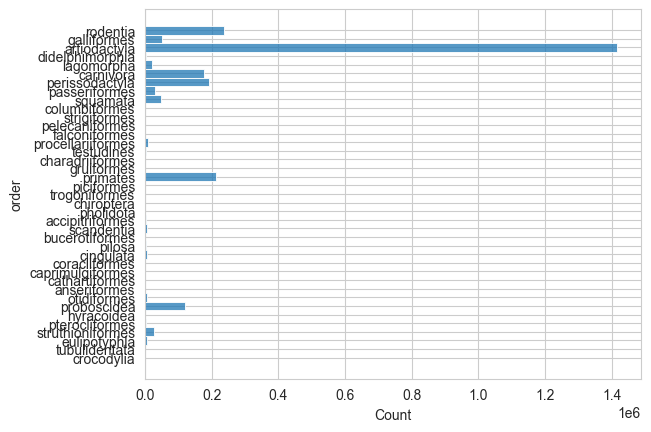

In [54]:
sns.histplot(df_cleaned.loc[df_cleaned["class"].isin(["aves", "mammalia", "reptilia"])], y = 'order')